# Example use of data simulation

This ipynb file cointains an example on how to simulate data.

## Import functions
This section imports functions used in this notebook. 

In [19]:
import json
from sinot.Simulation import Simulation

import numpy as np
np.random.seed(42)

## Define Parameters
This sections defines parameters for our study. Most important parameters are stored in a seperate json file. 

In [20]:
# Load example params
with open("parameter/example_params.json") as fp:
    study_params = json.load(fp)

# Drop out fraction to simulate drop out
drop_out={
    "fraction":0.7,
    "vacation":10
}

# study design defines the order of treatmens. None indicates no-treatment was given
study_design = [None, "Treatment_1","Treatment_2","Treatment_1","Treatment_2"]

days_per_period = 28


## Create Patient
First, we create a simulation object with our study params. These assumptions are equal for all patients in our study. Afterwards we can generate patients with different study design, days per period and drop out. It returns 2 dataframes:

* complete with all features
* patient with dropout values

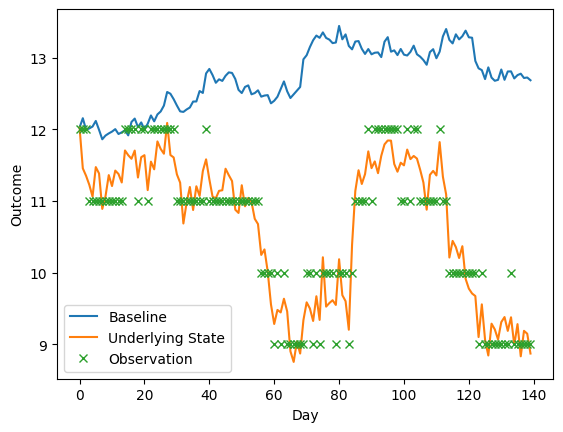

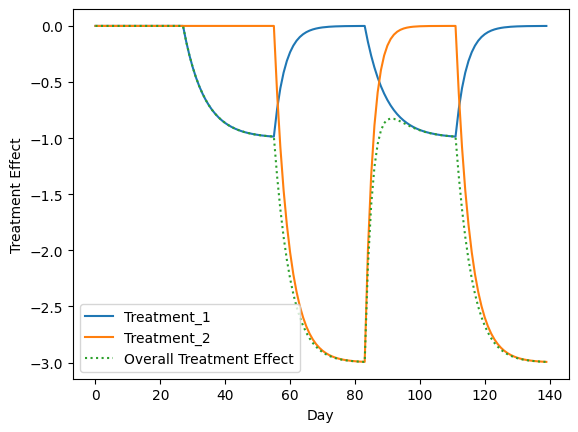

In [21]:
sim = Simulation(study_params)
pat_complete, pat_drop = sim.gen_patient(study_design, days_per_period, drop_out=drop_out)

sim.plot_patient(pat_complete)

In [22]:
pat_complete.head()

,patient_id,date,block,day,Activity,Treatment_1,Treatment_1_effect,Treatment_2,Treatment_2_effect,baseline_drift,underlying_state,Uncertain_Low_Back_Pain,treatment
0,0,2018-01-01,1,1,6993.428306,0,0.0,0,0.0,12.022746,12.022746,12,Treatment_1
1,0,2018-01-02,1,2,5723.471398,0,0.0,0,0.0,12.153460,11.454117,12,Treatment_1
2,0,2018-01-03,1,3,7295.377076,0,0.0,0,0.0,11.992712,11.350431,12,Treatment_1
3,0,2018-01-04,1,4,9046.059713,0,0.0,0,0.0,12.011175,11.224403,11,Treatment_1
4,0,2018-01-05,1,5,5531.693251,0,0.0,0,0.0,12.037164,11.059604,11,Treatment_1
